In [1]:
import numpy as np
import pyvista as pv
from pyvista.plotting.plotter import Plotter
import matplotlib.pyplot as plt
import matplotlib as mpl
import sys
sys.path.append(rf"D:\code\pywfn")
from pywfn.base import Mol
from pywfn.reader import LogReader
from pywfn.atomprop import activity
from pywfn.bondprop import piDM,bondOrder
from pywfn.maths import points_rotate
from pywfn.data.elements import elements
import matplotlib.pyplot as plt
import matplotlib as mpl
from pathlib import Path
from pywfn.utils import printer
printer.ifShell=False

In [3]:
root=rf"D:\BaiduSyncdisk\Articles\HFV\gfile\CH2X"
names=['Br','Cl','F','H','Me','NO2']
charges=['-','0','+']
valence=np.zeros(shape=len(names))
for n,name in enumerate(names):
    path=f'{root}/CH2{name}.log'
    mol=Mol(LogReader(path))
    
    caler=activity.Calculator()
    caler.mols=[mol]
    result=caler.freeValence(1)[0,-1]
    valence[n]=result

In [16]:
def show_result(datas,title:str='fig'):
    idxs=np.arange(len(datas))

    # ve=datas[:,0]
    # v0=datas[:,1]
    # vn=datas[:,2]
    # # vals=np.abs(np.vstack([ve-v0,vn-v0])).max(axis=0)
    
    idxs=np.argsort(datas)
    datas=datas[idxs]
    cs=['#339af0','#868e96','#fa5252']
    labels=['-1','0','+1']
    xs=[]
    total=len(names)+1
    for i in range(len(names)):
        x=i
        h=datas[i]
        xs.append(x)
        plt.bar(x,h,color=cs[1])

    plt.xticks(xs,[names[i] for i in idxs])
    plt.ylabel('Free Valence')
    # plt.legend()
    # plt.ylim(0,2.8)
    plt.savefig(fr'图像/{title}.png',dpi=300,bbox_inches='tight')
    plt.show()

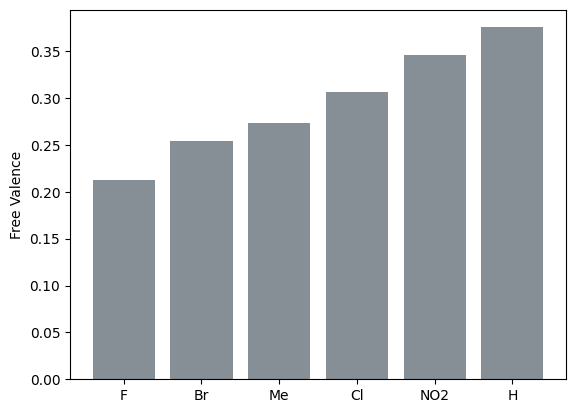

In [21]:
show_result(valence-1.75,title='ch2x自由基')

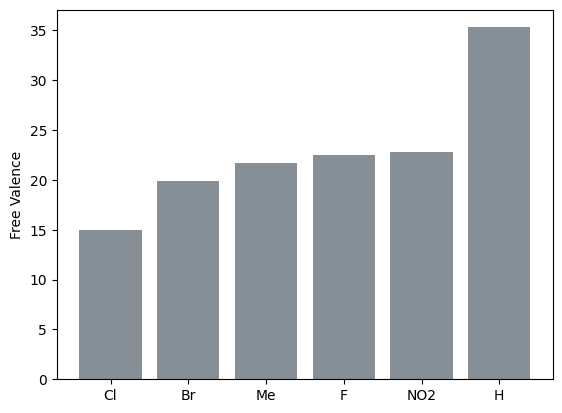

In [20]:
names=['Br','Cl','F','H','Me','NO2']
value=np.array([419.9,415.0,422.5,435.3,421.7,422.8])
show_result(value-400,title='ch2x_bde')